In [7]:
!pip install numpy==1.20
!pip install pandas  
!pip install scikit-learn 
!pip install matplotlib 
!pip install opencv-python 
!pip install seaborn 
!pip install tensorflow
!pip install beautifulsoup4 requests
!pip install Augmentor

  Using cached numpy-1.20.0-cp39-cp39-win_amd64.whl (13.7 MB)

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
ml-dtypes 0.2.0 requires numpy>1.20, but you have numpy 1.20.0 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 1.20.0 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.20.0 which is incompatible.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.



  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0


In [8]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import hashlib
import seaborn as sns
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from bs4 import BeautifulSoup
import requests
from urllib.request import urlretrieve

In [9]:
#Define function for deleting Corupted Image
#By checking for the presence of 'JFIF' in the first 10 bytes, the code is making a simple check to determine if the file adheres to the expected structure of a JPEG file. If 'JFIF' is found, it suggests that the file is likely a valid JPEG image. If 'JFIF' is not found, it could indicate that the file is corrupted or not in the expected format.         
def del_corupted_images(filename):
                 del_count = 0     
                 if os.path.isfile(filename):
                    try:
                        fobj = open(filename,'rb')
                        is_JFIF = b'JFIF' in fobj.peek(10)
                    finally:
                        fobj.close()
                    if not is_JFIF:
                        del_count += 1
                 return del_count


In [10]:
#sCRAPING DATA FROM NASA SITE(unfortunately it needs an authorisation from nasa but i will put the functions below)
url = "https://curator.jsc.nasa.gov/lunar/samplecatalog/photo_results_list.cfm"
response = requests.get(url)
print(response)

<Response [200]>


In [11]:
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)
#The purpose of this cell is to display the location of the img tag within the HTML code.


<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Error</title>
<link href="https://curator.jsc.nasa.gov:443/cf_scripts/scripts/assets/style.css" rel="stylesheet"/>
</head>
<body>
<div id="header"></div>
<div id="spot">
<img src="https://curator.jsc.nasa.gov:443/cf_scripts/scripts/assets/spot.png"/>
<div id="title">Error</div>
</div>
<div id="content">
	    An error occurred while executing the application. Please try again or contact the administrator.
	</div>
</body>
</html>



In [12]:
import os

def add_hyphen_to_filenames(folder_path):
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            # Split the file name and extension
            file_name, file_extension = os.path.splitext(file)

            # Create the new file name by adding a hyphen before the extension
            new_file_name = f"{file_name}-{file_extension}"

            # Create the full paths for the old and new file names
            old_file_path = os.path.join(subdir, file)
            new_file_path = os.path.join(subdir, new_file_name)

            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {old_file_path} -> {new_file_path}")

# Replace "/path/to/your/folder" with the actual path to your folder
folder_path = "C:\\Users\\TOPINFORMATIQUE\\Desktop\\Granite"
add_hyphen_to_filenames(folder_path)

Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\1-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\1--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\10-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\10--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\100-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\100--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\11-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\11--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\12-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\12--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\13-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\13--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\14-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\14--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\15-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\15--.jpg
Renamed: C:\Users\TOPINFORMATIQUE\Desktop\Granite\16-.jpg -> C:\Users\TOPINFORMATIQUE\Desktop\Granite\16--.jpg
R

In [13]:
#The variable table contains all the <td> (table data) tags found by the BeautifulSoup library in the parsed HTML document. The subsequent print(table) statement outputs the list of <td> tags, revealing their content and structure within the HTML.
table = soup.find_all('td')
print(table)

[]


In [14]:
images=[]
for i in table:
    if i.img!=None:
        images.append(i.img["src"])
   
for i, image in enumerate(images):
       print(image)
       urlretrieve(image, f"Desktop\\AESS-ENSI\\images\\saved-images\\image_{i}.jpg")
#now all the image sources are on "AESS-ENSI" directory
#As the website requires authentication to access its data, I will utilize my own dataset, which consists of Earth rocks. 
#The sub-directories are organized according to the classification labels assigned by NASA for moon classes.
#Each sub-directory corresponds to a distinct type of rock.

In [15]:

#Delete duplicated images use CNN from imagededup
!pip install imagededup
from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt
import imghdr


In [16]:
#The check_images function examines image files within specified sub-directories and identifies those with invalid extensions.
#It takes two parameters: s_dir for the main directory path and ext_list for a list of acceptable image file extensions.
#The function iterates through each sub-directory, checks the extension of each image file, and prints a message if it has an invalid extension. 
#The function then returns a list of paths for the identified problematic images.
def check_images(s_dir, ext_list):
    bad_images = []
    s_list = os.listdir(s_dir)
    for klass in s_list:
        klass_path = os.path.join(s_dir, klass)
        if os.path.isdir(klass_path):
            file_list = os.listdir(klass_path)
            for f in file_list:               
                f_path = os.path.join(klass_path, f)
                img_type = imghdr.what(f_path)
                if img_type not in ext_list:
                    print(f'file {f_path} has an invalid extension: {img_type}')
                    bad_images.append(f_path)
    return bad_images
sub_directories = ['Breccia', 'Basalt', 'Core', 'Soil', 'Crustal']
path = 'C:\\Users\\TOPINFORMATIQUE\\Desktop\\AESS-ENSI\\images\\saved-images'
good_exts = ['jpeg', 'png', 'gif', 'bmp'] #These specific extensions (['jpeg', 'png', 'gif', 'bmp']) have been selected to align with the preferred formats recognized and supported by the model

for i in sub_directories:
    bad_image_list = check_images(path, good_exts)
    
#Invalid images are removed from the system with a corresponding print message indicating success or failure in removal. 
for i in bad_image_list:
    try:
        os.remove(i)
        print(f"File '{i}' removed successfully.")
    except FileNotFoundError:
        print(f"File '{i}' not found.")
    except Exception as e:
        print(f"Error: {e}")

file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\15.jpg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\21.jpg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\26-.png has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\26.png has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\27-.jpeg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\27.jpeg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\27.jpg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\3.jpg has an invalid extension: webp
file C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt\34-.JPEG has an in

In [17]:
for subdir in os.listdir(path):
        print(subdir)

Basalt
Breccia
Core
Crustal
Soil
testing


In [46]:
import Augmentor
import os
import shutil
#This  function, augment_data, is used for data augmentation . 
#It takes three arguments: pth (the path to the directory containing the images), num_samples (the number of samples to generate for each original image), and augment_factor (the additional augmentations factor).

#The function works by iterating through each sub-directory in the provided path. For each sub-directory, it creates an Augmentor pipeline and defines a series of augmentations (rotation, flipping, zooming, and flipping again). It then generates a specified number of samples for each original image in the sub-directory.

#The augmentations are applied multiple times based on the augment_factor to further increase the diversity of the data. 

#After the augmentations, the original images are copied to the output directory.

#Finally, the function is called with a specified path, number of samples per image, and augmentation factor. The path should be defined before calling the function.
def augment_data(pth, num_samples, augment_factor=2):
    # Iterate through sub-directories
    for subdir in os.listdir(pth):
        subdir_path = os.path.join(pth, subdir)
        if os.path.isdir(subdir_path):
            output_dir = subdir_path  # Specify the output directory
            os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

            # Create Augmentor pipeline for each sub-directory
            pipeline = Augmentor.Pipeline(subdir_path, output_directory=output_dir)

            # Define augmentations
            pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
            pipeline.flip_left_right(probability=0.5)
            pipeline.zoom_random(probability=0.5, percentage_area=0.8)
            pipeline.flip_top_bottom(probability=0.5)
            print(num_samples)
            # Number of samples per original image
            pipeline.sample(num_samples)
            
            # Further augment the data by applying the pipeline multiple times
            for i in range(augment_factor - 1):
                pipeline.process()

            # Copy original images to the output directory
            original_images = os.listdir(subdir_path)
            for img in original_images:
                shutil.copy(os.path.join(subdir_path, img), output_dir)

num_samples_per_image = 5 # Number of samples to generate for each original image
augment_factor = 3  # Additional augmentations factor
print(path)
# Make sure to define the 'path' variable with the correct path before calling the function
augment_data(path, num_samples=num_samples_per_image, augment_factor=augment_factor)


C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images
Initialised with 190 image(s) found.
Output directory set to C:\Users\TOPINFORMATIQUE\Desktop\AESS-ENSI\images\saved-images\Basalt.5


Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x2D40576F6A0>: 100%|███| 5/5 [00:01<00:00,  3.08 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=600x169 at 0x2D4058854F0>: 100%|█| 190/190 [00:06<00:00, 29.22 Samples
Processing <PIL.Image.Image image mode=RGBA size=600x169 at 0x2D4092B0280>: 100%|█| 190/190 [00:05<00:00, 32.16 Samples


SameFileError: 'C:\\Users\\TOPINFORMATIQUE\\Desktop\\AESS-ENSI\\images\\saved-images\\Basalt\\1-.jpg' and 'C:\\Users\\TOPINFORMATIQUE\\Desktop\\AESS-ENSI\\images\\saved-images\\Basalt\\1-.jpg' are the same file

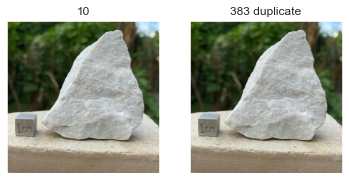

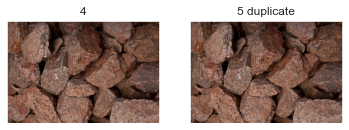

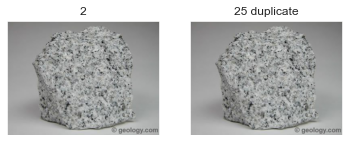

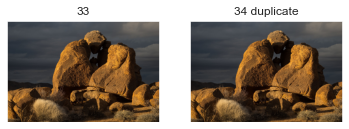

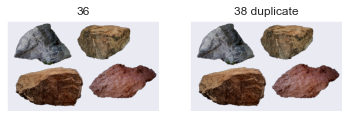

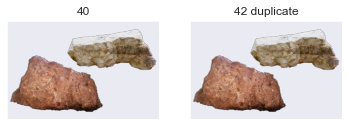

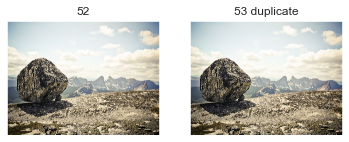

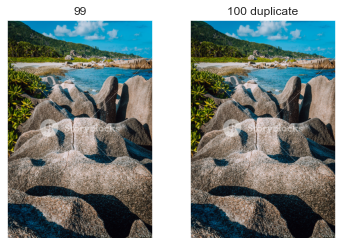

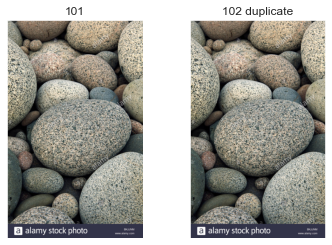

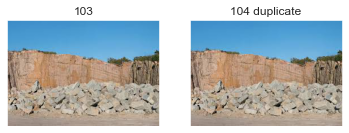

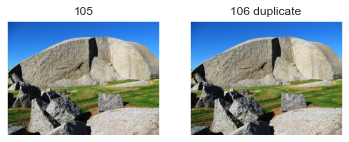

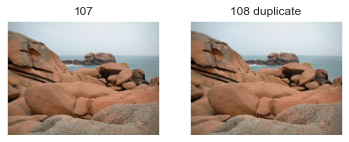

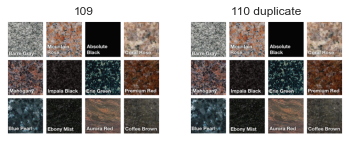

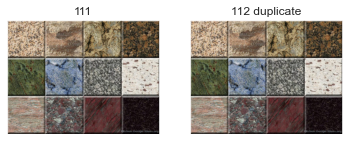

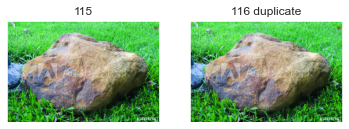

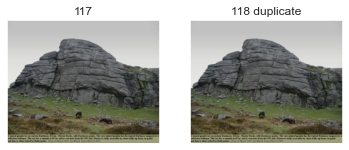

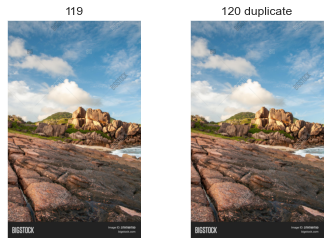

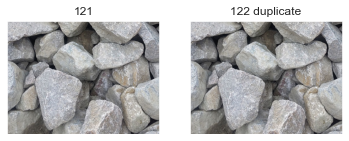

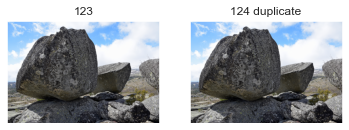

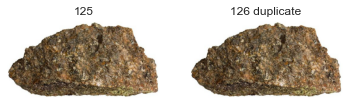

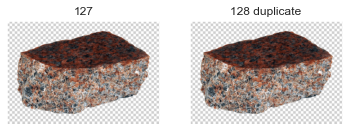

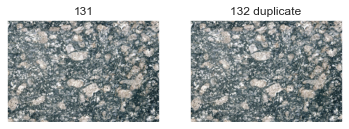

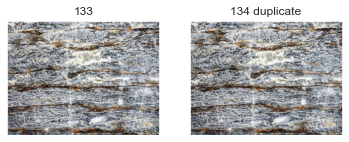

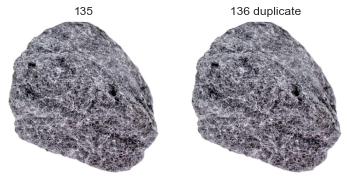

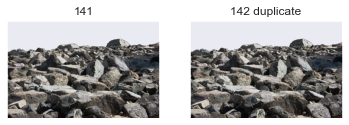

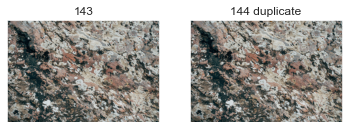

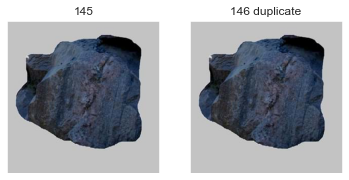

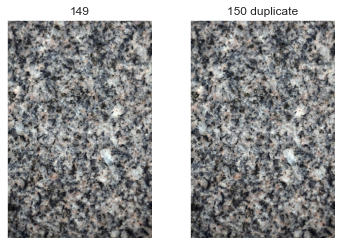

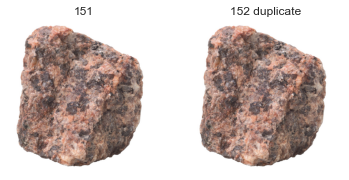

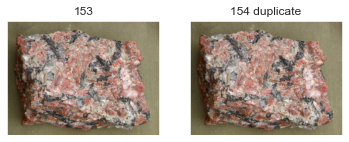

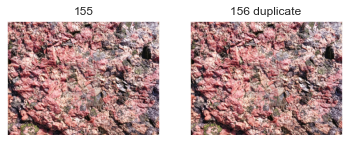

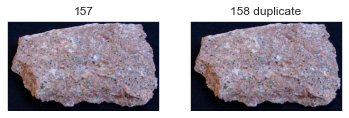

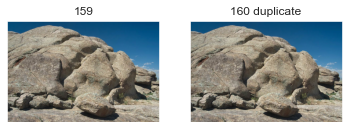

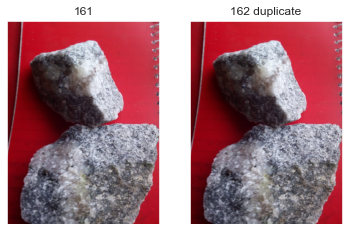

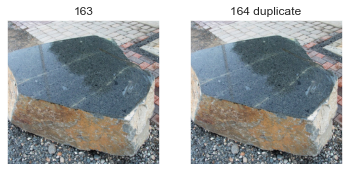

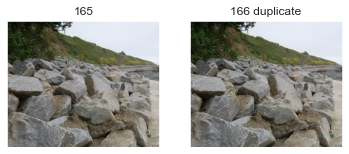

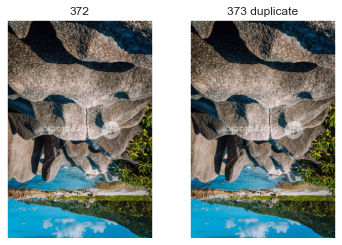

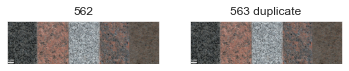

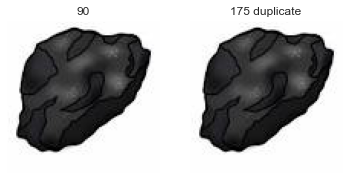

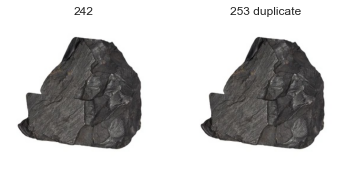

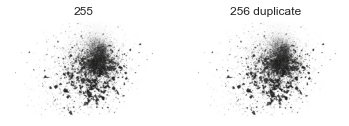

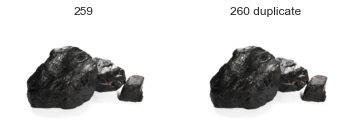

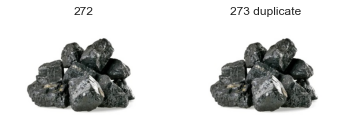

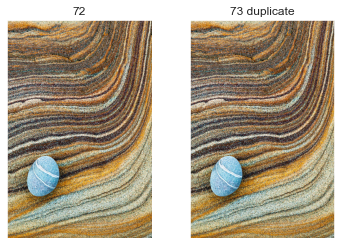

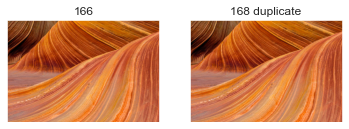

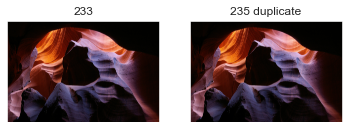

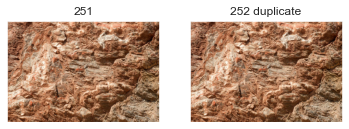

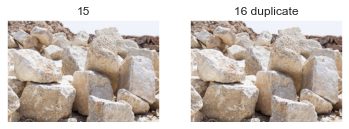

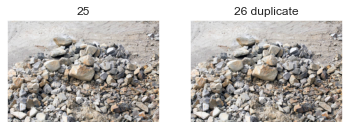

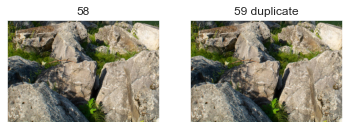

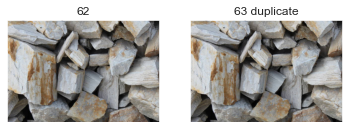

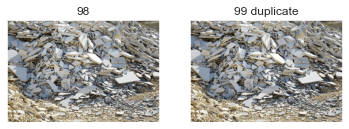

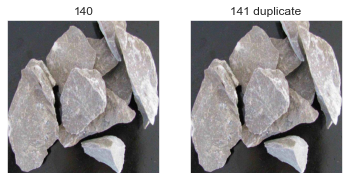

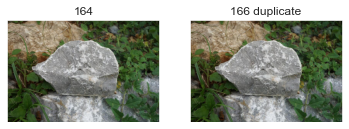

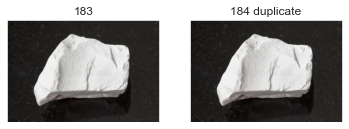

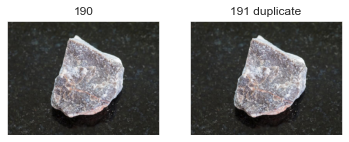

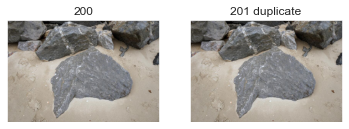

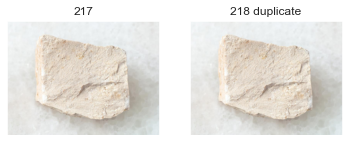

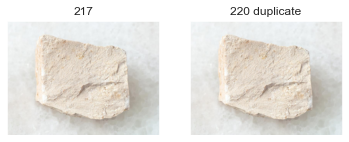

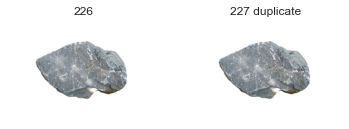

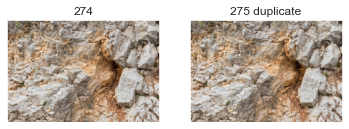

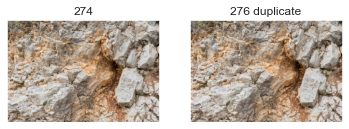

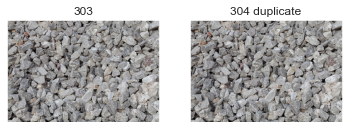

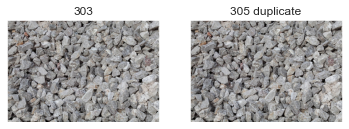

In [47]:
import hashlib
from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt
#This Python function, del_shw_RepIm, is used to delete duplicate images from a specified directory.
#It takes two arguments: path (the path to the directory containing the images) and sub_dir (the sub-directory within the path).
#The function works by changing the current directory to the specified path and sub-directory. 
#It then lists all the files in the directory. 
#For each file, it calculates a hash value using the MD5 algorithm. 
#If the hash value is not already in the hash_keys dictionary, it adds the file to the filepaths list and its label to the labels list.
#If the hash value is already in the dictionary, it adds the file to the duplicates list.
def del_shw_RepIm(path,sub_dir):
            path = os.path.join(path,sub_dir)
            os.chdir(path)
            files_list = os.listdir()
            duplicates = []
            hash_keys = dict()
            for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
                 if os.path.isfile(filename):
                    with open(filename, 'rb') as f:
                        filehash = hashlib.md5(f.read()).hexdigest()

                    if filehash not in hash_keys:
                        
                        hash_keys[filehash] = index
                        if del_corupted_images(path+'/'+ filename) != 1 :
                            filepaths.append(path +'/'+ filename)
                            labels.append(sub_dir)
                    else:
                         duplicates.append((index,hash_keys[filehash]))

            for file_indexes in duplicates:
                     try:    
                        
                         plt.subplot(121),plt.imshow(plt.imread(files_list[file_indexes[1]]))
                         plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

                         plt.subplot(122),plt.imshow(plt.imread(files_list[file_indexes[0]]))
                         plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
                         plt.show()

                     except OSError as e:
                        print(error)
                        continue

# Example usage:
filepaths=[]
labels=[]
for sub_dir in sub_directories:
    del_shw_RepIm(path,sub_dir)


In [48]:
print ('filepaths: ', len(filepaths), ' labels: ', len(labels))
pd.Series(labels).value_counts()

filepaths:  1799  labels:  1799


Basalt     493
Breccia    383
Core       349
Soil       317
Crustal    257
dtype: int64

In [50]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))
pd.Series(labels).value_counts()

filepaths:  1799    labels:  1799


Basalt     493
Breccia    383
Core       349
Soil       317
Crustal    257
dtype: int64

In [88]:
# Function to load and preprocess image data
def load_data(path):
       # Load the training dataset from the directory

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        src_path,validation_split=0.1,
        subset='training',
        labels='inferred',
        label_mode='categorical',
        image_size=[224, 224],
        seed=123,
        interpolation='nearest',
        batch_size=20,
        shuffle=True,
    )
       # Load the validation dataset from the directory

    valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
        src_path,validation_split=0.1,
        subset='validation',
        labels='inferred',
        label_mode='categorical',
        image_size=[224, 224],
        seed=123,
        interpolation='nearest',
        batch_size=20,
        shuffle=False,
    )
       # Get the number of batches in the validation dataset

    val_batches = tf.data.experimental.cardinality(valid_ds)

    # Create the test dataset from the validation dataset
    test_ds = valid_ds.take(val_batches // 2)

    # Reduce the validation dataset 
    valid_ds = valid_ds.skip(val_batches // 2)
    
    return train_ds, valid_ds, test_ds
# Function to preprocess the datasets

def data_pipeline(train_ds, valid_ds, test_ds):
    # Function to convert the images to float32
    def convert_to_float(image, label):
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        return image, label
      # Constant for prefetching
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    ds_train = (
        train_ds
        .map(convert_to_float)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    ds_valid = (
        valid_ds
        .map(convert_to_float)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    ds_test = (
        test_ds
        .map(convert_to_float)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    return ds_train, ds_valid, ds_test
# Usage
# Load the image data
train_ds,valid_ds,test_ds = load_data(os.path.join(src_path,i))
# Preprocess the data
ds_train,ds_valid,ds_train = data_pipeline(train_ds, valid_ds,test_ds)

Found 1971 files belonging to 5 classes.
Using 1774 files for training.
Found 1971 files belonging to 5 classes.
Using 197 files for validation.


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense ,Dropout
# Initialize a Sequential model
model = Sequential()
# Add a Rescaling layer to the model. This layer will rescale the input data by scaling it down by a factor of 1/255. This is a common preprocessing step for image data.

model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
# Add a Conv2D layer to the model. This layer will apply 32 convolution filters of size 5x5 to the input data. The 'padding' parameter is set to 'same', which means that the input data will be padded with zeros so that the output has the same width and height as the input. The 'activation' parameter is set to 'relu', which means that the ReLU (Rectified Linear Unit) activation function will be applied to the output of the convolution operation.
model.add(Conv2D(32, 5, padding='same', activation='relu'))
# Add a MaxPooling2D layer to the model. This layer will downsample the input data by taking the maximum value over a 2x2 window. This is a common operation in CNNs to reduce the spatial dimensions of the data.
model.add(MaxPooling2D())
# Add another Conv2D layer to the model. This layer will apply 64 convolution filters of size 5x5 to the input data. The parameters are the same as the previous Conv2D layer.

model.add(Conv2D(64, 5, padding='same', activation='relu'))
# Add another MaxPooling2D layer to the model. This layer will downsample the input data by taking the maximum value over a 2x2 window.

model.add(MaxPooling2D())
# Add another Conv2D layer to the model. This layer will apply 128 convolution filters of size 5x5 to the input data. The parameters are the same as the previous Conv2D layers.

model.add(Conv2D(128, 5, padding='same', activation='relu',))
# Add a Dropout layer to the model. This layer will randomly set a fraction of the input units to 0 at each update during training time, which helps prevent overfitting. The 'rate' parameter is set to 0.3, which means that 30% of the input units will be set to 0.
model.add(Dropout(0.4))
# Add a Flatten layer to the model. This layer will flatten the input data into a 1D array. This is necessary because the next layer (Dense) expects a 1D input.
model.add(Flatten())
# Add a Dense layer to the model. This layer will apply a linear transformation to the input data. The 'units' parameter is set to 256, which means that the output will have 256 units. The 'activation' parameter is set to 'relu', which means that the ReLU activation function will be applied to the output of the linear transformation.
model.add(Dense(256, activation='relu'))
# Add another Dense layer to the model. This layer will apply a linear transformation to the input data. The 'units' parameter is set to 5, which means that the output will have 5 units. The 'activation' parameter is set to 'softmax', which means that the softmax activation function will be applied to the output of the linear transformation. This is a common choice for the output layer of a classification model, as it will output a probability distribution over the classes.
model.add(Dense(5 , activation = 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 56, 56, 128)     

In [90]:
model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])

In [91]:
from tensorflow.keras.callbacks import  EarlyStopping 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)] 
hist = model.fit(train_ds,validation_data=valid_ds, epochs=50 , callbacks=mycallbacks )

Epoch 1/50
89/89 [==============================] - 101s 1s/step - loss: 2.5302 - accuracy: 0.2976 - val_loss: 1.2088 - val_accuracy: 0.6289
Epoch 2/50
89/89 [==============================] - 99s 1s/step - loss: 1.3938 - accuracy: 0.3766 - val_loss: 1.4468 - val_accuracy: 0.5670
Epoch 3/50
89/89 [==============================] - 100s 1s/step - loss: 1.2352 - accuracy: 0.4989 - val_loss: 1.0027 - val_accuracy: 0.7113
Epoch 4/50
89/89 [==============================] - 99s 1s/step - loss: 1.0044 - accuracy: 0.6015 - val_loss: 0.8634 - val_accuracy: 0.6495
Epoch 5/50
89/89 [==============================] - 100s 1s/step - loss: 0.8252 - accuracy: 0.6714 - val_loss: 0.7084 - val_accuracy: 0.7938
Epoch 6/50
89/89 [==============================] - 99s 1s/step - loss: 0.6225 - accuracy: 0.7644 - val_loss: 0.4059 - val_accuracy: 0.8866
Epoch 7/50
89/89 [==============================] - 98s 1s/step - loss: 0.4913 - accuracy: 0.8258 - val_loss: 0.9456 - val_accuracy: 0.7320
Epoch 8/50
89/89 

In [62]:
model.evaluate(test_ds)

3/3 [==============================] - 1s 155ms/step - loss: 0.3364 - accuracy: 0.9062


[0.3364330232143402, 0.90625]

In [147]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Loading the camera
cap = cv2.VideoCapture(0)

while True:
   # Reading the frame
   _, frame = cap.read()
   height, width, channels = frame.shape

   # Detecting objects
   blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
   net.setInput(blob)
   outs = net.forward(output_layers)

   # Showing informations on the screen
   class_ids = []
   confidences = []
   boxes = []
   for out in outs:
       for detection in out:
           scores = detection[5:]
           class_id = np.argmax(scores)
           confidence = scores[class_id]
           if confidence > 0.5:
               # Object detected
               center_x = int(detection[0] * width)
               center_y = int(detection[1] * height)
               w = int(detection[2] * width)
               h = int(detection[3] * height)

               # Rectangle coordinates
               x = int(center_x - w / 2)
               y = int(center_y - h / 2)

               boxes.append([x, y, w, h])
               confidences.append(float(confidence))
               class_ids.append(class_id)

   indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
   for i in range(len(boxes)):
       if i in indexes:
           x, y, w, h = boxes[i]
           label = str(classes[class_ids[i]])
           cv2.rectangle(frame, (x, y), (x + w, y + h), (0,255,0), 2)
           cv2.putText(frame, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0), 3)

   cv2.imshow("Image", frame)
   key = cv2.waitKey(1)
   if key == 27:
       break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20230620::readNetFromDarknet'
